# STRESS E PRODUTIVIDADE EM RELAÇÃO À HABITOS DE SAÚDE
O objetivo deste projeto é analisar a influência dos hábitos diários, como padrões de sono e nível de sedentarismo, na produtividade no trabalho e nos níveis de estresse do indivíduo. O conjunto de dados utilizado contém 5.000 registros, abrangendo uma ampla diversidade de idades, gêneros e outras informações para análise. Os dados podem ser encontrados no link https://www.kaggle.com/datasets/adilshamim8/sleep-cycle-and-productivity/data

### Importação dos Dados

In [2]:
# Importanto Bibliotecas
import pandas as pd
import matplotlib.pyplot as plt

tabela = pd.read_csv("sleep_cycle_productivity.csv")
display(tabela)

,Date,Person_ID,Age,Gender,Sleep Start Time,Sleep End Time,Total Sleep Hours,Sleep Quality,Exercise (mins/day),Caffeine Intake (mg),Screen Time Before Bed (mins),Work Hours (hrs/day),Productivity Score,Mood Score,Stress Level
0,2024-04-12,1860,32,Other,23.33,4.61,5.28,3,86,87,116,8.808920,8,3,6
1,2024-11-04,1769,41,Female,21.02,2.43,5.41,5,32,21,88,6.329833,10,3,7
2,2024-08-31,2528,20,Male,22.10,3.45,5.35,7,17,88,59,8.506306,10,9,10
3,2024-02-22,8041,37,Other,23.10,6.65,7.55,8,46,34,80,6.070240,8,4,2
4,2024-02-23,4843,46,Other,21.42,4.17,6.75,10,61,269,94,11.374994,8,7,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2024-01-03,5192,38,Female,22.78,4.15,5.37,1,55,216,96,9.384504,5,2,1
4996,2024-06-02,7134,55,Male,21.48,5.39,7.91,4,70,81,177,5.016193,5,6,2
4997,2024-08-13,6265,44,Female,22.02,2.82,4.80,6,21,90,139,11.788651,2,7,1
4998,2024-12-26,4205,55,Other,23.47,7.87,8.40,9,15,87,161,7.093145,8,1,6


# Relação entre Produtividade e Qualidade de Sono
## Hipotese: o descanso impacta diretamente na produtividade do indívuo
Para testar a hipótese, vamos analisar como o índice de produtividade varia conforme a qualidade de sono

,Productivity Score,Sleep Quality
0,1,5.644860
1,2,5.536260
2,3,5.590336
3,4,5.526946
4,5,5.346578
5,6,5.425150
6,7,5.408644
7,8,5.587426
8,9,5.425386
9,10,5.730620


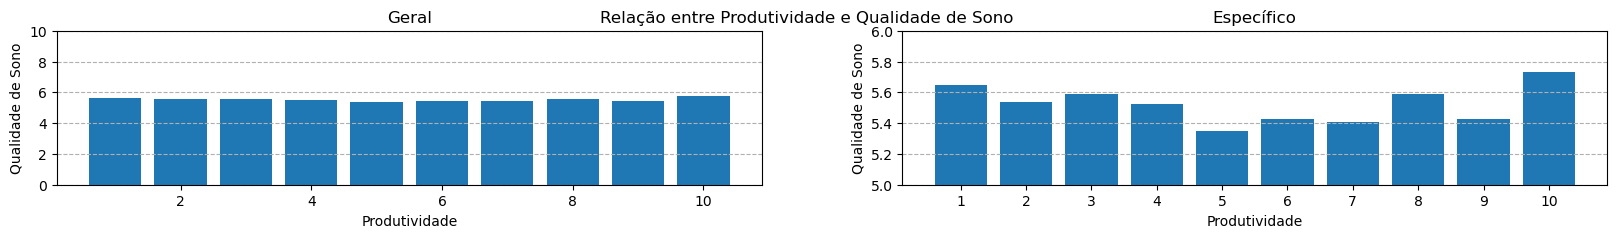

In [3]:
produtividade_qualidade = tabela[["Productivity Score", "Sleep Quality"]].groupby("Productivity Score").mean().reset_index()
display(produtividade_qualidade)

# criando uma figura
figura = plt.figure(figsize=(20, 2)) # definindo o tamanho
figura.add_subplot(121) # repartindo em pedaços (linhas, colunas, posicao do plot)
figura.suptitle('Relação entre Produtividade e Qualidade de Sono') # adicionando um titulo 

# um novo plot 1
plt.title('Grafico de Linha')
plt.bar(produtividade_qualidade["Productivity Score"], produtividade_qualidade["Sleep Quality"])
plt.grid(axis='y', linestyle='--')
plt.axis( ymin=0, ymax=10)
plt.title('Geral')
plt.xlabel('Produtividade')
plt.ylabel('Qualidade de Sono')

# um novo plot 2
figura.add_subplot(122) # repartindo em pedaços (linhas, colunas, posicao do plot)
plt.bar(produtividade_qualidade["Productivity Score"], produtividade_qualidade["Sleep Quality"])
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
plt.axis( ymin=5, ymax=6)
plt.grid(axis='y', linestyle='--')
plt.title('Específico')
plt.xlabel('Produtividade')
plt.ylabel('Qualidade de Sono')

plt.show
plt.savefig('graficos.png')

## Analise da qualidade de sono em relação as horas dormidas
### Hipotese: a qualidade de sono de uma pessoa é proporcional à quantidade de horas dormidas. Ou seja, quanto mais tempo houver de descanso, melhor a qualidade de sono.
Para testar a hipótese, extrair da tabela principal a média de horas totais dormidas, para cada valor de qualidade, e analisar quanto tempo de sono as pessoas que disseram que tem uma boa qualidade de sono tiveram.

,Sleep Quality,Sleep Start Time,Sleep End Time,Total Sleep Hours
0,1,22.022583,4.977062,6.954438
1,2,22.023241,4.934831,6.911789
2,3,21.991143,4.980102,6.988939
3,4,21.962047,5.021654,7.059646
4,5,22.018369,4.999827,6.981459
5,6,22.023354,4.972168,6.948937
6,7,21.942573,4.909304,6.966809
7,8,22.027800,5.047210,7.019654
8,9,22.044187,4.995667,6.950917
9,10,22.003225,4.968023,6.964626


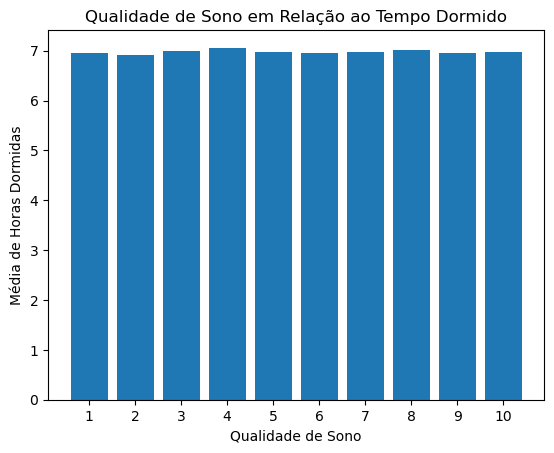

In [3]:
# Extrair da tabela os valores de interesse para trabalhar
tempo = tabela[["Sleep Quality", "Sleep Start Time", "Sleep End Time","Total Sleep Hours"]].groupby("Sleep Quality").mean().reset_index()
display(tempo)

# Colocar em um gráfico
plt.bar(tempo["Sleep Quality"], tempo["Total Sleep Hours"])
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
plt.title('Qualidade de Sono em Relação ao Tempo Dormido')
plt.xlabel('Qualidade de Sono')
plt.ylabel('Média de Horas Dormidas')
plt.show()

,Date,Person_ID,Age,Gender,Sleep Start Time,Sleep End Time,Total Sleep Hours,Sleep Quality,Exercise (mins/day),Caffeine Intake (mg),Screen Time Before Bed (mins),Work Hours (hrs/day),Productivity Score,Mood Score,Stress Level
2,2024-08-31,2528,20,Male,22.10,3.45,5.35,7,17,88,59,8.506306,10,9,10
3,2024-02-22,8041,37,Other,23.10,6.65,7.55,8,46,34,80,6.070240,8,4,2
4,2024-02-23,4843,46,Other,21.42,4.17,6.75,10,61,269,94,11.374994,8,7,9
5,2024-07-08,7439,38,Male,21.77,6.41,8.64,10,88,251,123,6.207993,1,9,7
7,2024-01-28,7278,26,Female,20.78,3.14,6.35,8,36,98,171,9.100460,3,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4982,2024-01-14,9060,37,Female,21.40,2.39,4.99,7,62,54,1,11.501573,5,7,3
4985,2024-06-06,9001,32,Other,22.52,5.74,7.22,8,56,152,22,6.334289,10,1,4
4989,2024-10-09,2506,18,Other,23.73,4.36,4.62,10,49,200,174,4.040211,6,7,5
4991,2024-01-02,7147,34,Other,22.97,6.84,7.88,8,73,219,127,8.931448,1,2,8


,Productivity Score,Stress Level,Sleep Quality
2,10,10,7
3,8,2,8
4,8,9,10
5,1,7,10
7,3,3,8
...,...,...,...
4982,5,3,7
4985,10,4,8
4989,6,5,10
4991,1,8,8


<function matplotlib.pyplot.show(close=None, block=None)>

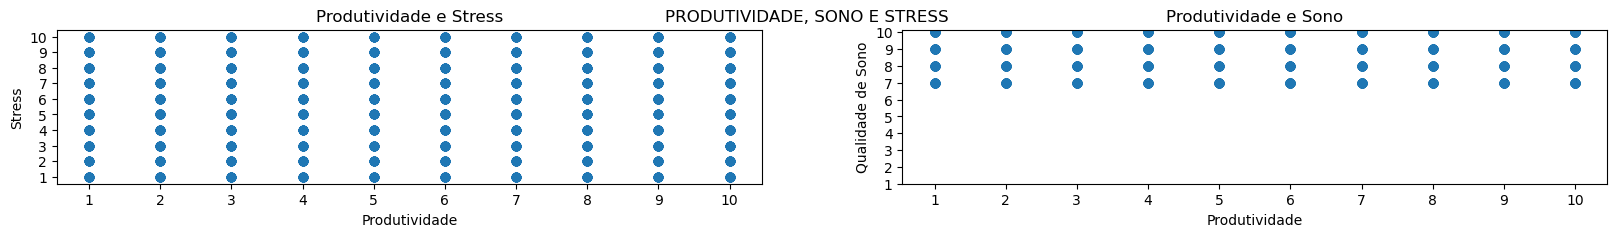

In [33]:
# QUANTAS PESOAS TEM UM SONO BOM
sono_bom = tabela[tabela["Sleep Quality"] >= 7]
display(sono_bom)

sono_bom2 = sono_bom[['Productivity Score', 'Stress Level', 'Sleep Quality']]
display(sono_bom2)

# criando uma figura
figura = plt.figure(figsize=(20, 2)) # definindo o tamanho
figura.add_subplot(121) # repartindo em pedaços (linhas, colunas, posicao do plot)
figura.suptitle('PRODUTIVIDADE, SONO E STRESS') # adicionando um titulo 

# um novo plot 1
plt.scatter(sono_bom2['Productivity Score'], sono_bom2['Stress Level'])
#plt.grid(axis='y', linestyle='--')
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
plt.yticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
plt.title('Produtividade e Stress')
plt.xlabel('Produtividade')
plt.ylabel('Stress')

# um novo plot 2
figura.add_subplot(122) # repartindo em pedaços (linhas, colunas, posicao do plot)
plt.scatter(sono_bom2['Productivity Score'], sono_bom2['Sleep Quality'])
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
plt.yticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
#plt.grid(axis='y', linestyle='--')
plt.title('Produtividade e Sono')
plt.xlabel('Produtividade')
plt.ylabel('Qualidade de Sono')

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

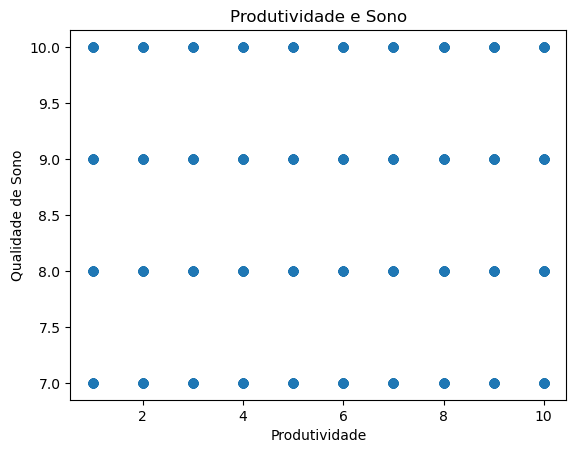

In [35]:
plt.scatter(sono_bom2['Productivity Score'], sono_bom2['Sleep Quality'])

#plt.grid(axis='y', linestyle='--')
plt.title('Produtividade e Sono')
plt.xlabel('Produtividade')
plt.ylabel('Qualidade de Sono')

plt.show

### Conclusão:
Com base na análise dos dados, é possível observar que a qualidade do sono não está diretamente relacionada à quantidade total de horas dormidas, uma vez que a maioria das pessoas mantiveram um período de sono constante em aproximadamente 7 horas diárias de descanso. Embora muitas vezes se acredite que dormir mais significa dormir melhor, os dados mostram que pessoas com maior qualidade de sono nem sempre são aquelas que dormem por mais tempo. Isso sugere que outros fatores podem ter um impacto mais significativo na qualidade do descanso.